# Лабораторная работа №4

## Линейные модели, SVM и деревья решений.

### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
   * одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
   * SVM;
   * дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

target_col='class'

%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('exams.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = data.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 1000
Всего колонок: 8


In [5]:
# Вывод списка колонок с типами данных.
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
# Проверка на пропуски
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Кодирование категориальных признаков

In [7]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

gender - object - 0
race/ethnicity - object - 0
parental level of education - object - 0
lunch - object - 0
test preparation course - object - 0
math score - int64 - 0
reading score - int64 - 0
writing score - int64 - 0


In [8]:
le = LabelEncoder()
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        data[col] = le.fit_transform(data[col]);
        print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course


### Разделение выборки на обучающую и тестовую

<Axes: >

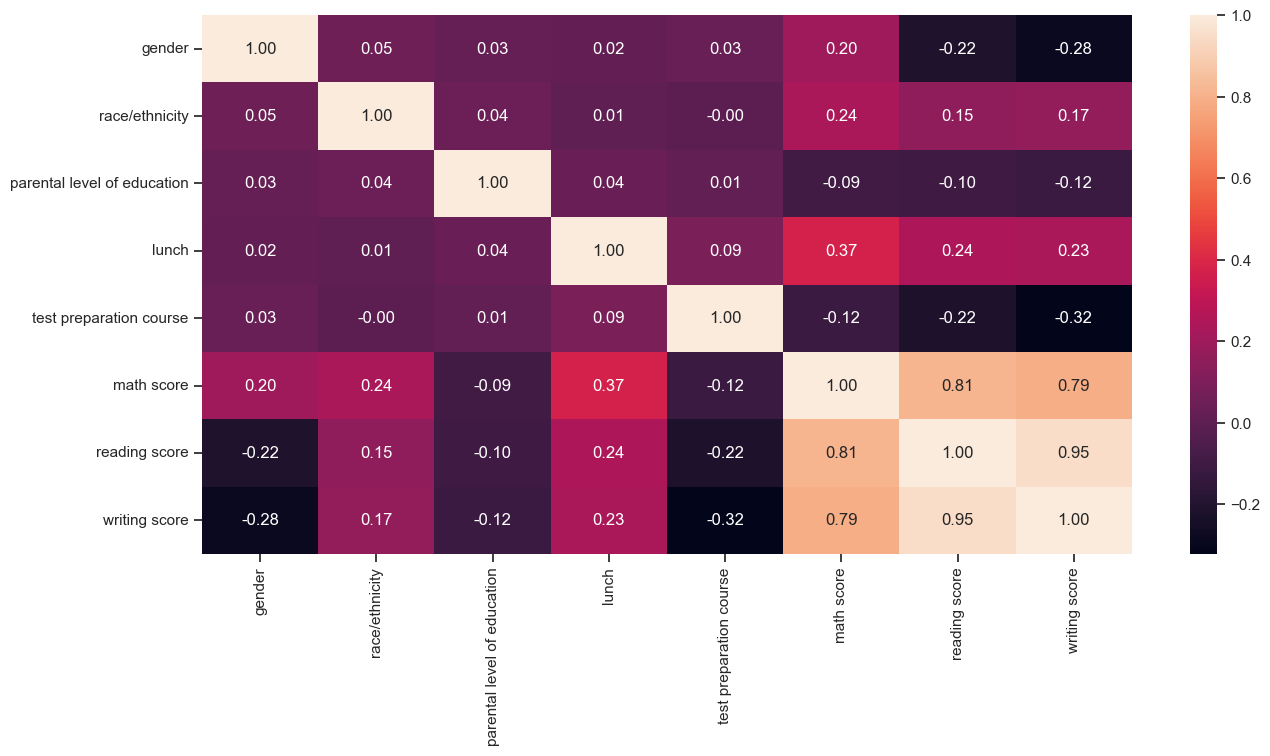

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
X = data[["math score", "reading score"]]
Y = data["writing score"]

In [11]:
X
print('Входные данные:\n', X.head()) 

Входные данные:
    math score  reading score
0          59             70
1          96             93
2          57             76
3          70             70
4          83             85


In [12]:
Y
print('Выходные данные:\n', Y.head())

Выходные данные:
 0    78
1    87
2    77
3    63
4    86
Name: writing score, dtype: int64


In [13]:
pd.DataFrame(X, columns=X.columns).describe()

,math score,reading score
count,1000.000000,1000.000000
mean,67.810000,70.382000
std,15.250196,14.107413
min,15.000000,25.000000
25%,58.000000,61.000000
50%,68.000000,70.500000
75%,79.250000,80.000000
max,100.000000,100.000000


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(750, 2), (250, 2)
(750,), (250,)


### Линейная регрессия

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [16]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)
lr_y_pred = Lin_Reg.predict(X_test)

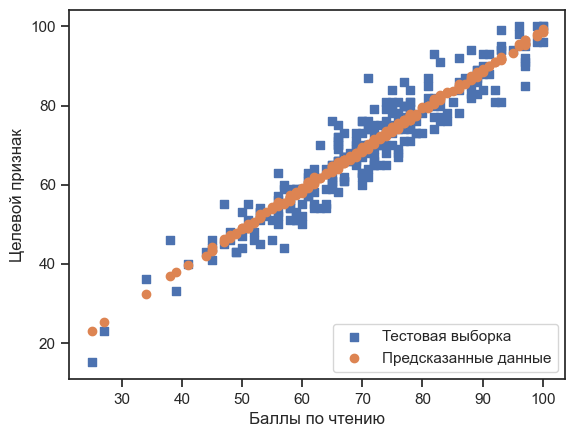

In [17]:
plt.scatter(X_test["reading score"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Баллы по чтению')
plt.ylabel ('Целевой признак')
plt.show()

### SVM

In [18]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [19]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [20]:
pred_y = svc.predict(X_test)

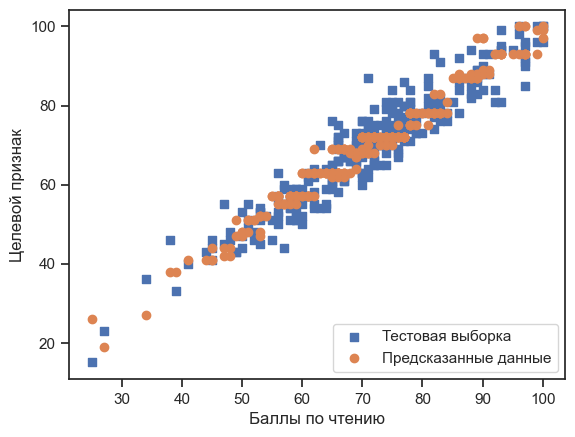

In [21]:
plt.scatter(X_test["reading score"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Баллы по чтению')
plt.ylabel ('Целевой признак')
plt.show()

### Дерево решений

In [22]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [23]:
# Обучим дерево на всех признаках
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_test, Y_test)
clf

DecisionTreeClassifier(random_state=1)

In [24]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')